# Training DenseNet on Cifar10 using DFW

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/DL_project/
!pwd

Mounted at /content/drive
/content/drive/MyDrive/DL_project
/content/drive/MyDrive/DL_project


In [ ]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import *
import os
import time
import gc
import shutil
import h5py

from dfw.dfw import DFW
from dfw.dfw.losses import set_smoothing_enabled
from dfw.dfw.losses import MultiClassHingeLoss
from dfw.experiments.models.densenet import DenseNet3
from dfw.experiments.models.wide_resnet import WideResNet

from train_utils import *

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
os.makedirs("data/cifar", exist_ok=True)
train_dataset_10 = CIFAR10(root='data/cifar', download=True, transform=transform)
test_dataset_10 = CIFAR10(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_10), len(test_dataset_10))

train_dataset_100 = CIFAR100(root='data/cifar', download=True, transform=transform)
test_dataset_100 = CIFAR100(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_100), len(test_dataset_100))

Files already downloaded and verified
50000 10000
Files already downloaded and verified
50000 10000


In [ ]:
trainer = Net_Trainer(device, 'dn', 'dn_dfw_c10', train_dataset_10, test_dataset_10, lr=0.1, optm='dfw', 
                      loss='svm', batch_size=64, epochs=100, weight_decay=1e-4, smooth=True, mom=0.9)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)

cuda Tesla T4
Epoch:0   Loss:0.719   Val loss:1.282   Accuracy:54.409   Best val loss:1.282   Time taken:268.872
Epoch:1   Loss:0.433   Val loss:0.775   Accuracy:70.362   Best val loss:0.775   Time taken:266.809
Epoch:2   Loss:0.325   Val loss:0.563   Accuracy:78.493   Best val loss:0.563   Time taken:266.011
Epoch:3   Loss:0.27   Val loss:0.51   Accuracy:80.394   Best val loss:0.51   Time taken:265.604
Epoch:4   Loss:0.237   Val loss:0.485   Accuracy:81.34   Best val loss:0.485   Time taken:268.037
Epoch:5   Loss:0.21   Val loss:0.447   Accuracy:82.643   Best val loss:0.447   Time taken:268.934
Epoch:6   Loss:0.191   Val loss:0.495   Accuracy:81.927   Best val loss:0.447   Time taken:268.501
Epoch:7   Loss:0.174   Val loss:0.481   Accuracy:81.967   Best val loss:0.447   Time taken:268.494
Epoch:8   Loss:0.16   Val loss:0.453   Accuracy:83.489   Best val loss:0.447   Time taken:265.39
Epoch:9   Loss:0.151   Val loss:0.481   Accuracy:81.618   Best val loss:0.447   Time taken:262.639
Epo

In [ ]:
# Conitnue training by loading checkpoint
# Best epoch = epoch with least val loss
trainer = Net_Trainer(device, 'dn', 'dn_dfw_c10', train_dataset_10, test_dataset_10, load_ckpt='v1_ckpt_dn_dfw_c10', lr=0.1, optm='dfw', loss='svm', 
                      batch_size=64, epochs=100, weight_decay=1e-4, smooth=True)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)

cuda Tesla T4
Epoch:39   Loss:0.001   Val loss:0.237   Accuracy:91.113   Best val loss:0.237   Time taken:256.096
Epoch:40   Loss:0.001   Val loss:0.235   Accuracy:90.983   Best val loss:0.235   Time taken:260.003
Epoch:41   Loss:0.001   Val loss:0.242   Accuracy:90.764   Best val loss:0.235   Time taken:261.86
Epoch:42   Loss:0.001   Val loss:0.236   Accuracy:91.053   Best val loss:0.235   Time taken:261.405
Epoch:43   Loss:0.001   Val loss:0.238   Accuracy:90.834   Best val loss:0.235   Time taken:258.023
Epoch:44   Loss:0.001   Val loss:0.235   Accuracy:90.983   Best val loss:0.235   Time taken:261.314
Epoch:45   Loss:0.001   Val loss:0.234   Accuracy:91.013   Best val loss:0.234   Time taken:258.75
Epoch:46   Loss:0.001   Val loss:0.237   Accuracy:90.983   Best val loss:0.234   Time taken:256.958
Epoch:47   Loss:0.001   Val loss:0.23   Accuracy:91.262   Best val loss:0.23   Time taken:257.383
Epoch:48   Loss:0.001   Val loss:0.228   Accuracy:91.381   Best val loss:0.228   Time take

NameError: ignored

cuda Tesla T4


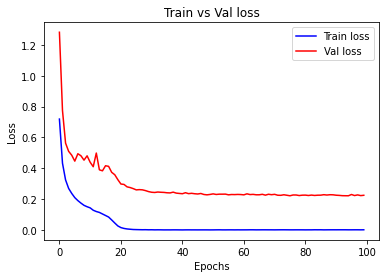

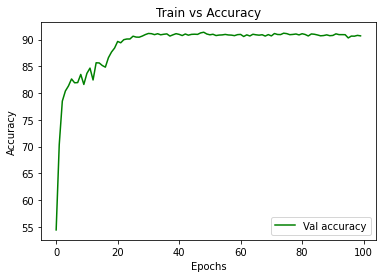

Best epoch: 94


In [ ]:
# Conitnue training by loading checkpoint
# Best epoch = epoch with least val loss
# This cell is used only to plot the graphs
trainer = Net_Trainer(device, 'dn', 'dn_dfw_c10', train_dataset_10, test_dataset_10, load_ckpt='v1_ckpt_dn_dfw_c10', lr=0.1, optm='dfw', loss='svm', 
                      batch_size=64, epochs=100, weight_decay=1e-4, smooth=True)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)